In [12]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category= FutureWarning)

In [13]:
file_path=r"D:\Jupyter Notebook\Bank-Loan-Analysis-Project\Data\02_sql_cleaned_Loan_Applications.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file {file_path}' was not found.")
print(os.getcwd())

D:\Jupyter Notebook\Bank-Loan-Analysis-Project\Analysis


In [14]:
df=pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128,360.0,1,Rural,0
1,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66,360.0,1,Urban,1
2,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120,360.0,1,Urban,1
3,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141,360.0,1,Urban,1
4,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267,360.0,1,Urban,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            543 non-null    object 
 1   Gender             531 non-null    object 
 2   Married            541 non-null    object 
 3   Dependents         530 non-null    float64
 4   Education          543 non-null    object 
 5   Self_Employed      517 non-null    object 
 6   ApplicantIncome    543 non-null    int64  
 7   CoapplicantIncome  543 non-null    float64
 8   LoanAmount         543 non-null    int64  
 9   Loan_Amount_Term   529 non-null    float64
 10  Credit_History     543 non-null    int64  
 11  Property_Area      543 non-null    object 
 12  Loan_Status        543 non-null    int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 55.3+ KB


In [16]:
print("Rows:",df.shape[0],"| Columns:",df.shape[1])

print("\n---Numerical Summary---")
display(df.describe())

Rows: 543 | Columns: 13

---Numerical Summary---


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,530.000000,543.000000,543.000000,543.000000,529.000000,543.000000,543.000000
mean,0.769811,5472.331492,1547.268729,145.088398,342.351607,0.843462,0.688766
std,1.023280,6330.726832,2504.696507,83.309428,64.861662,0.363699,0.463425
min,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000
25%,0.000000,2897.500000,0.000000,100.000000,360.000000,1.000000,0.000000
50%,0.000000,3814.000000,1126.000000,127.000000,360.000000,1.000000,1.000000
75%,2.000000,5790.000000,2251.500000,165.500000,360.000000,1.000000,1.000000
max,3.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000,1.000000


In [17]:
df['Loan_Status']=df['Loan_Status'].replace({1:'Approved',0:'Rejected'})
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace =True)
df['Self_Employed']=df['Self_Employed'].fillna("Unknown")

In [18]:
for col in ['Gender','Married','Dependents']:
    df[col].fillna(df[col].mode()[0],inplace=True)
print("\n Missing values after imputation:")
print(df.isnull().sum())
df['Loan_Status']=df['Loan_Status'].replace({1:'Approved',0:'Rejected'})
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace =True)
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']
df['Loan_income_Ratio'] = df['LoanAmount']/df['Total_Income']
print("\n New features created: Total_Income,Loan_Income_Ratio")


 Missing values after imputation:
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 New features created: Total_Income,Loan_Income_Ratio


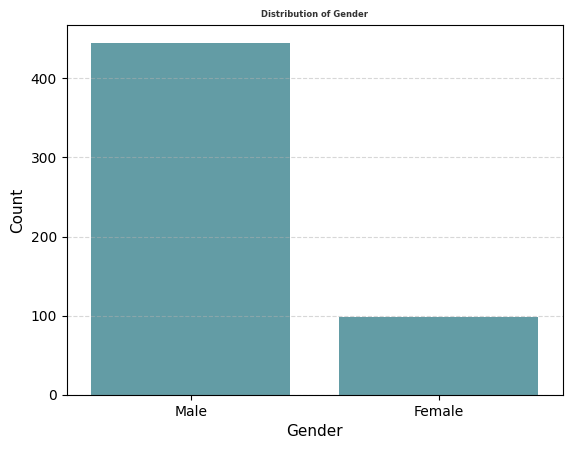

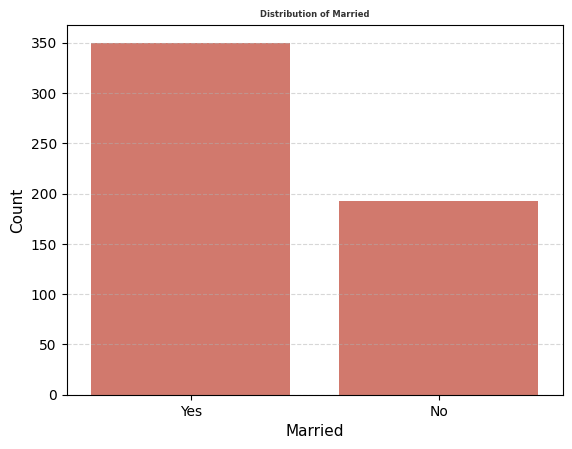

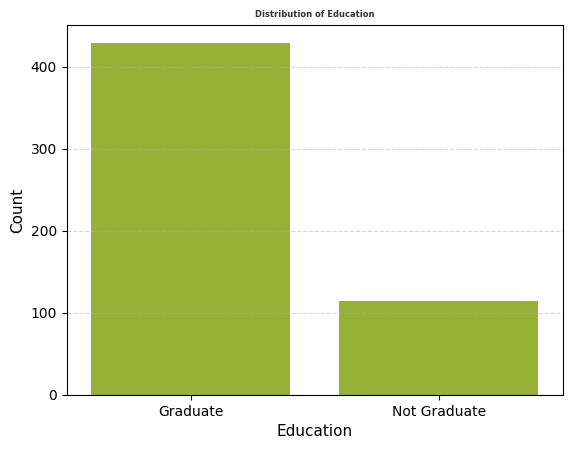

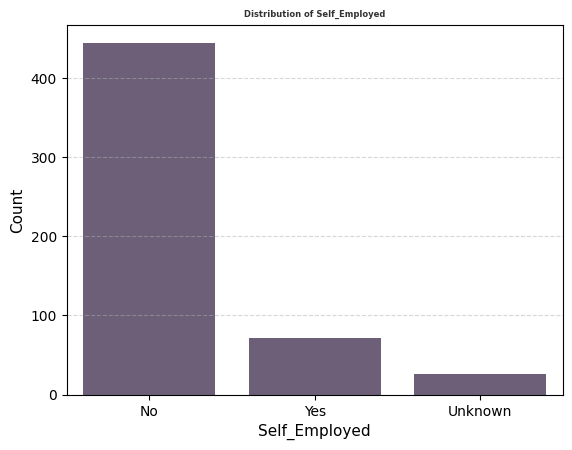

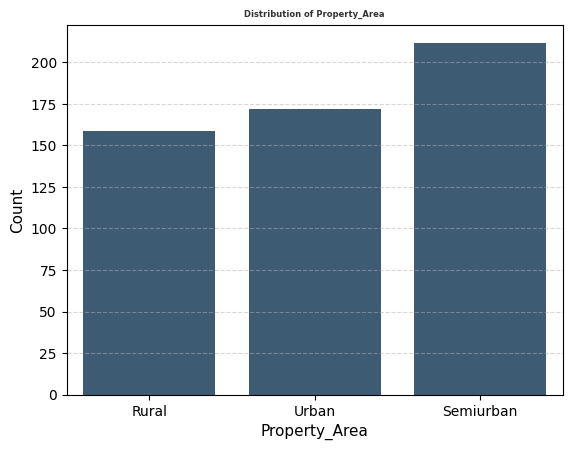

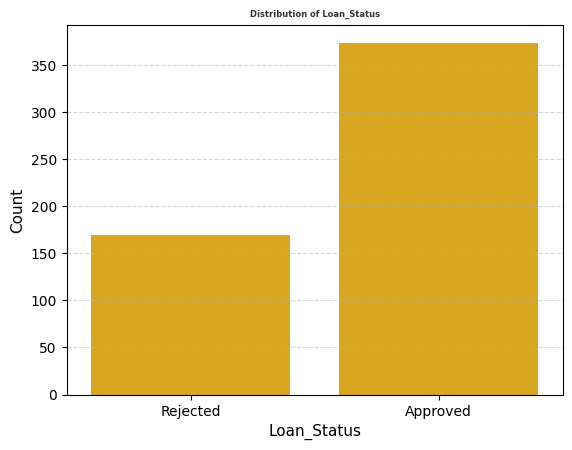

In [19]:
colors={'Gender':'#58A4B0','Married':'#E26D5C','Education':'#A2C523','Self_Employed':'#6C5B7B','Property_Area':'#355C7D','Loan_Status':'#F8B400'}
categorical =['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for col in categorical:
    sns.countplot(x=df[col],color=colors[col])
    plt.title(f'Distribution of {col}',fontsize=6,fontweight='bold',color='#333333')
    plt.xlabel(col,fontsize=11)
    plt.ylabel('Count',fontsize=11)
    plt.grid(axis='y',linestyle='--',alpha=0.5)
    plt.show()

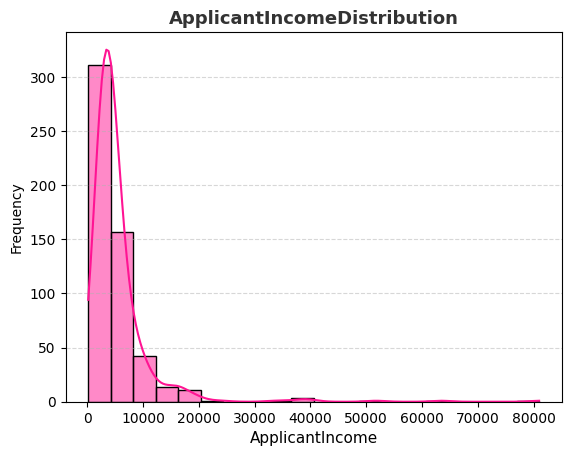

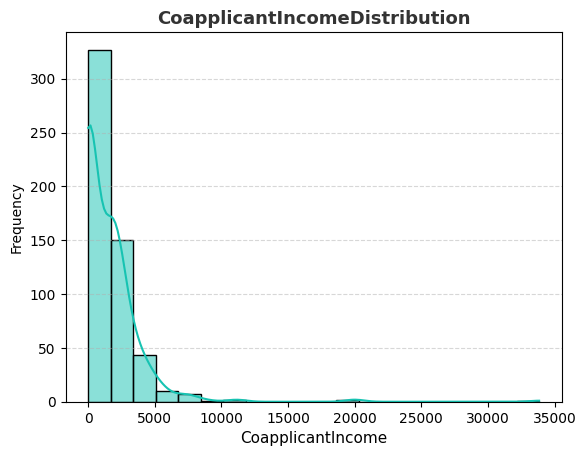

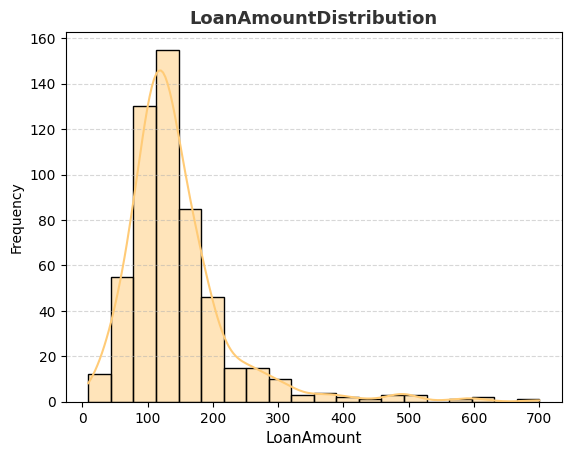

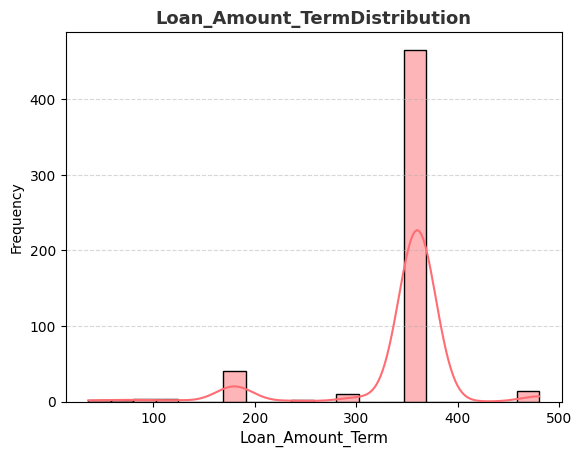

In [20]:
num_colors={'ApplicantIncome':'deeppink','CoapplicantIncome':'#17c3B2','LoanAmount':'#FFCB77',
             'Loan_Amount_Term':'#FE6D73'}

numerical =['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

for col in numerical:
    sns.histplot(df[col],kde=True,color=num_colors[col],bins=20)
    plt.title(f'{col}Distribution',fontsize=13,fontweight='bold',color='#333333')
    plt.xlabel(col,fontsize=11)
    plt.ylabel('Frequency',fontsize=10)
    plt.grid(axis='y',linestyle='--',alpha=0.5)
    plt.show()

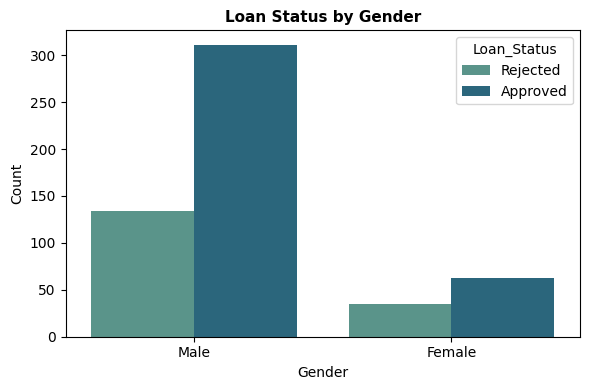

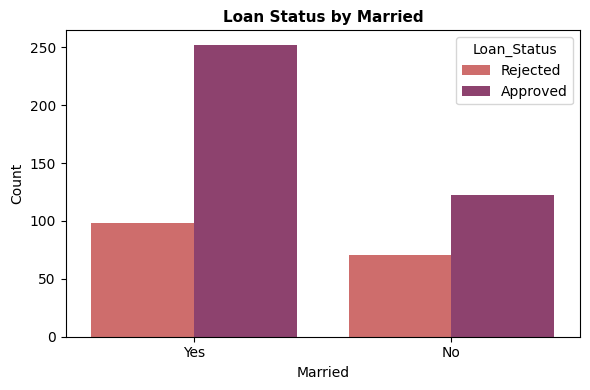

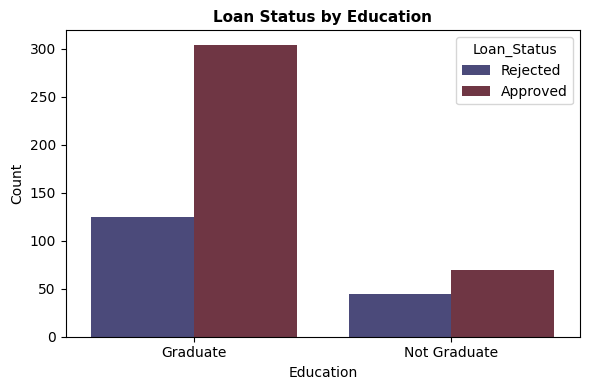

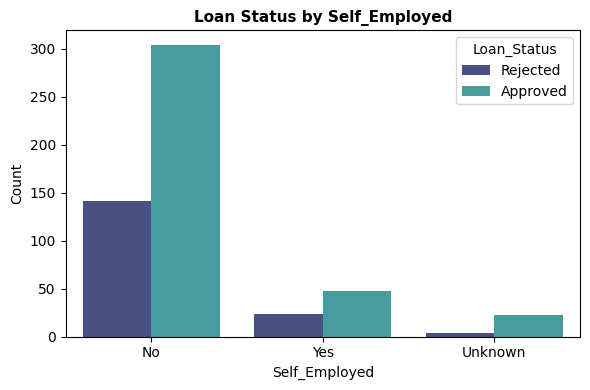

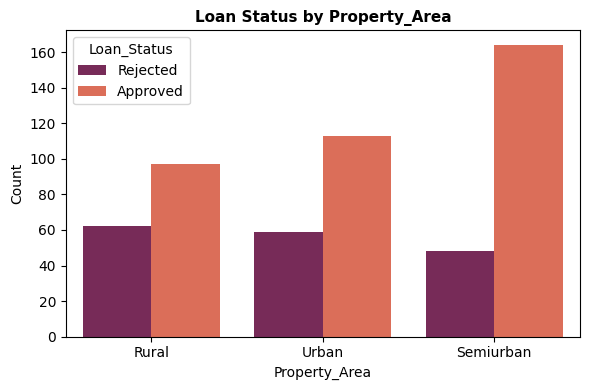

In [21]:
color_palettes=['crest','flare','icefire','mako','rocket','viridis;,cividis']
for i,col in enumerate(categorical[:-1]):
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col],hue=df['Loan_Status'],palette=color_palettes[i% len(color_palettes)])
    plt.title(f'Loan Status by {col}',fontsize=11,fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

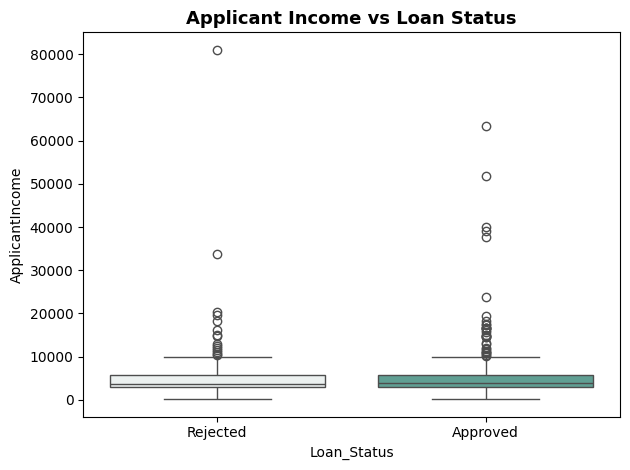

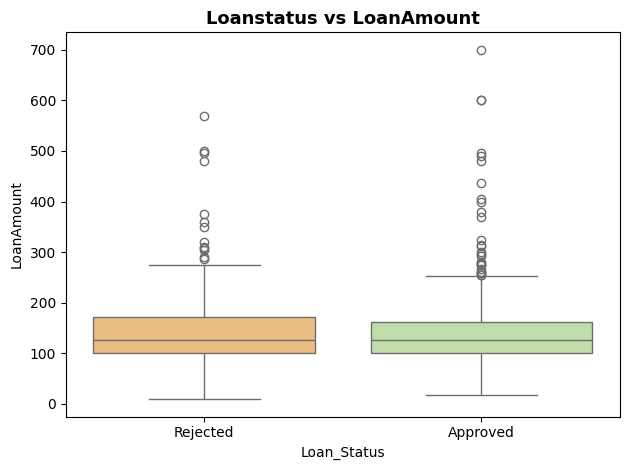

In [22]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df,palette='light:#5A9')
plt.title('Applicant Income vs Loan Status',fontsize=13,fontweight='bold')
plt.tight_layout()
plt.show()


sns.boxplot(x='Loan_Status',y='LoanAmount',data=df,palette='Spectral')
plt.title('Loanstatus vs LoanAmount',fontsize=13,fontweight='bold')
plt.tight_layout()
plt.show()

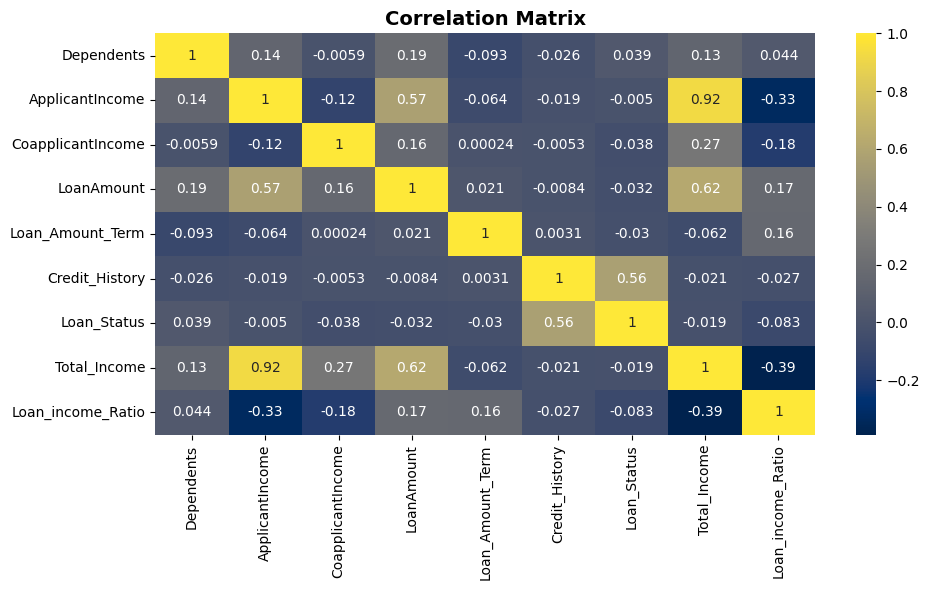

In [23]:
df['Loan_Status']=df['Loan_Status'].map({"Approved":1,"Rejected":0})
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='cividis')
plt.title('Correlation Matrix',fontsize=14,fontweight='bold')
plt.tight_layout()
plt.show()

In [24]:
df.to_csv(r"D:\Jupyter Notebook\Bank-Loan-Analysis-Project\Data\02_sql_cleaned_Loan_Applications.csv",index=False)
print("Cleaned data saved to D:/Jupyter Notebook/Bank-Loan-Analysis-Project/Data/02_sql_cleaned_Loan_Applications.csv")

Cleaned data saved to D:/Jupyter Notebook/Bank-Loan-Analysis-Project/Data/02_sql_cleaned_Loan_Applications.csv
